### **About Dataset**
---


This is data about the average time a user spends on social media. This data was obtained from [Kaggle](https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media).

The description for each column is as follows:

* **age**: The age of the user.
* **gender**: The gender identity of the user (Male, Female, Non-binary).
* **demographics**: The type of area the user resides in (Urban, Suburban, Rural).
* **interests**: The user's primary area of interest or hobby.
* **location**:The country of residence for the user.
* **platform**: The social media platform where the user spends time.
* **profession**: The user's occupation or professional status.
* **income**: The yearly income of the user.
* **indebt**: Indicates whether the user is in debt (True or False).
* **homeowner**: Indicates whether the user owns a home (True or False).
* **owns_cars**: Indicates whether the user owns cars (True or False).





### **Objective**
---

I will perform exploratory data analysis to see what information related to the data we can get.

### **Exploratroy Data Analysis**


---



In [ ]:
# Import all libraries that we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') #Set style for plot

# Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load and read dataset to notebook
file = '/content/avgtimespendonsocmed.csv'
df = pd.read_csv(file)

In [ ]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [ ]:
# show descriptive statistics
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [ ]:
# show for categorical value
df.describe(include='object')

,gender,platform,interests,location,demographics,profession
count,1000,1000,1000,1000,1000,1000
unique,3,3,3,3,3,3
top,male,Instagram,Lifestlye,Australia,Rural,Marketer Manager
freq,337,363,341,352,340,355


In [ ]:
# check data type for each column
df.dtypes

age              int64
gender          object
time_spent       int64
platform        object
interests       object
location        object
demographics    object
profession      object
income           int64
indebt            bool
isHomeOwner       bool
Owns_Car          bool
dtype: object

In [ ]:
# info for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


with using `df.info()`, we can see there is no null values on dataset
but we can check that again with `.isnull()` method

In [ ]:
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [ ]:
# Let's create a function to categorize all ages, it will help us to analyze age categories based on time spent
def myfunc(age):
    if age<2:
        return 'baby'
    elif age>2 and age<=10:
        return 'children'
    elif age>10 and age<=16:
        return 'teenage'
    elif age>16 and age<=30:
        return 'Young Adults'
    elif age>30 and age <=50:
        return 'middel aged Adults'
    elif age>50 and age<=70:
        return 'aged'
    else:
        return 'old'

In [ ]:
# Create new column name Age Category
df['Age Category']=df['age'].apply(myfunc)

In [ ]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,Age Category
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,aged
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,middel aged Adults
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,middel aged Adults
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,aged
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Young Adults


No missing values

In [ ]:
# calculate overal average time spend on social media
overall_avg_time_spent = df['time_spent'].mean()
print("Overall average time spent on social media:", overall_avg_time_spent)

Overall average time spent on social media: 5.029


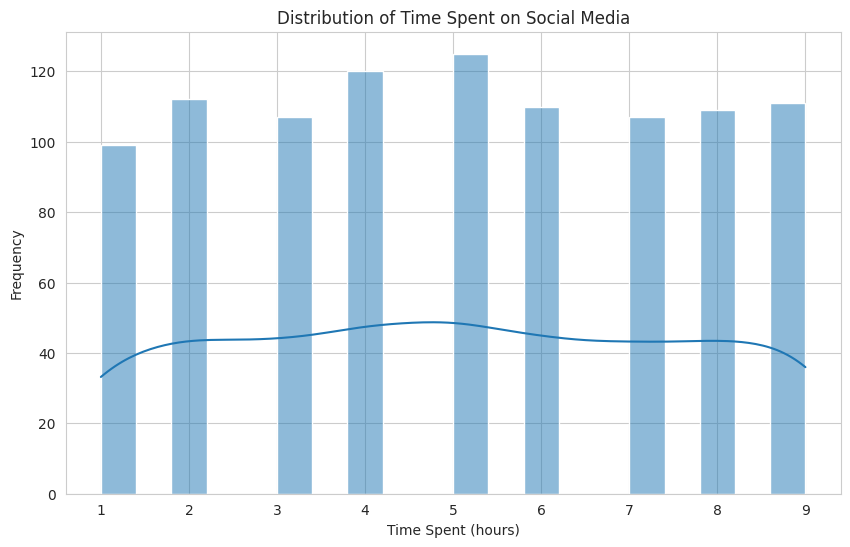

In [ ]:
# Visualize the distribution of time spent on social media
plt.figure(figsize=(10, 6))
sns.histplot(df['time_spent'], bins=20, kde=True)
plt.title('Distribution of Time Spent on Social Media')
plt.xlabel('Time Spent (hours)')
plt.ylabel('Frequency')
plt.show()

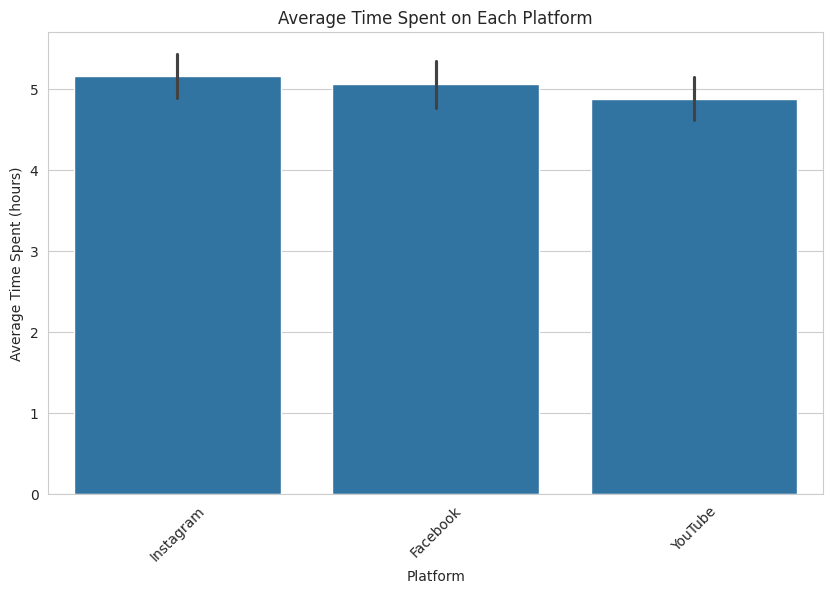

In [ ]:
# Visualize the average time spent on each platform
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='time_spent', data=df)
plt.title('Average Time Spent on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Average Time Spent (hours)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the average time spent on social media for gender and platform
avg_time_by_gender = df.groupby(['gender', 'platform'])['time_spent'].mean().reset_index()
avg_time_by_gender

,gender,platform,time_spent
0,female,Facebook,5.423529
1,female,Instagram,5.311111
2,female,YouTube,4.864865
3,male,Facebook,4.991150
4,male,Instagram,4.867188
5,male,YouTube,4.562500
6,non-binary,Facebook,4.834862
7,non-binary,Instagram,5.300000
8,non-binary,YouTube,5.113821


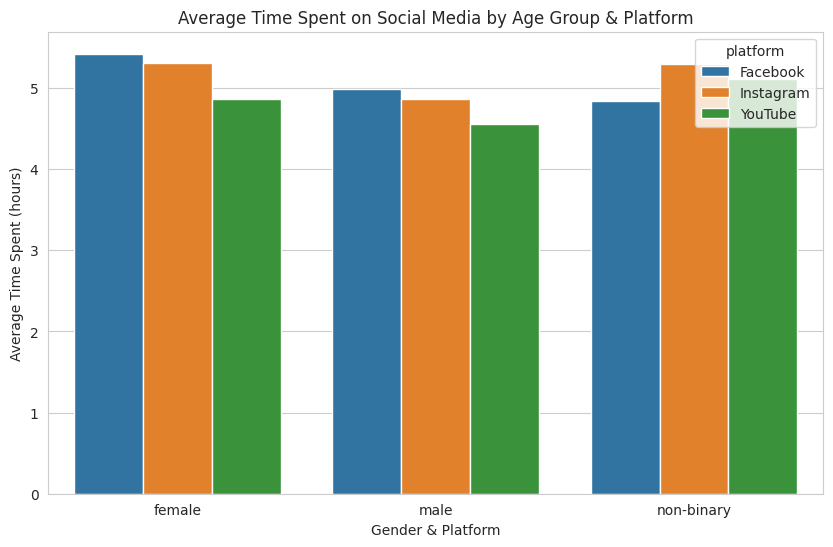

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='time_spent', hue='platform', data=avg_time_by_gender)
plt.title('Average Time Spent on Social Media by Gender & Platform')
plt.xlabel('Gender & Platform')
plt.ylabel('Average Time Spent (hours)')
plt.show()


In [ ]:
# # Calculate the average time spent on social media for age category and platform
avg_time_by_age_cat = df.groupby(['Age Category', 'platform'])['time_spent'].mean().reset_index()
avg_time_by_age_cat

,Age Category,platform,time_spent
0,Young Adults,Facebook,5.487805
1,Young Adults,Instagram,4.728972
2,Young Adults,YouTube,5.166667
3,aged,Facebook,4.662651
4,aged,Instagram,5.266055
5,aged,YouTube,4.577320
6,middel aged Adults,Facebook,5.035211
7,middel aged Adults,Instagram,5.374150
8,middel aged Adults,YouTube,4.892617


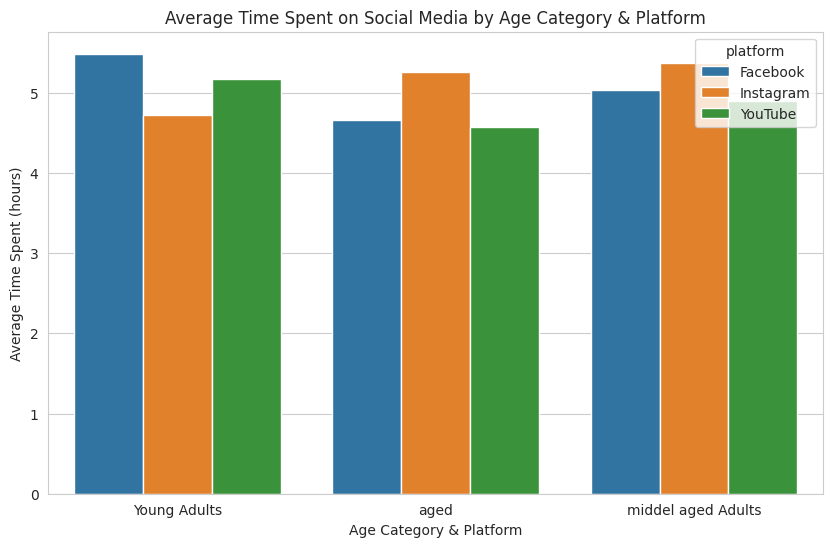

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Category', y='time_spent', hue='platform', data=avg_time_by_age_cat)
plt.title('Average Time Spent on Social Media by Age Category & Platform')
plt.xlabel('Age Category & Platform')
plt.ylabel('Average Time Spent (hours)')
plt.show()

In [ ]:
# Calculate the average time spent on social media for location and demographics
avg_time_by_location = df.groupby(['location', 'demographics'])['time_spent'].mean().reset_index()
avg_time_by_location

,location,demographics,time_spent
0,Australia,Rural,5.176471
1,Australia,Sub_Urban,5.346457
2,Australia,Urban,5.113208
3,United Kingdom,Rural,5.151786
4,United Kingdom,Sub_Urban,4.941176
5,United Kingdom,Urban,4.643478
6,United States,Rural,4.715596
7,United States,Sub_Urban,5.500000
8,United States,Urban,4.615385


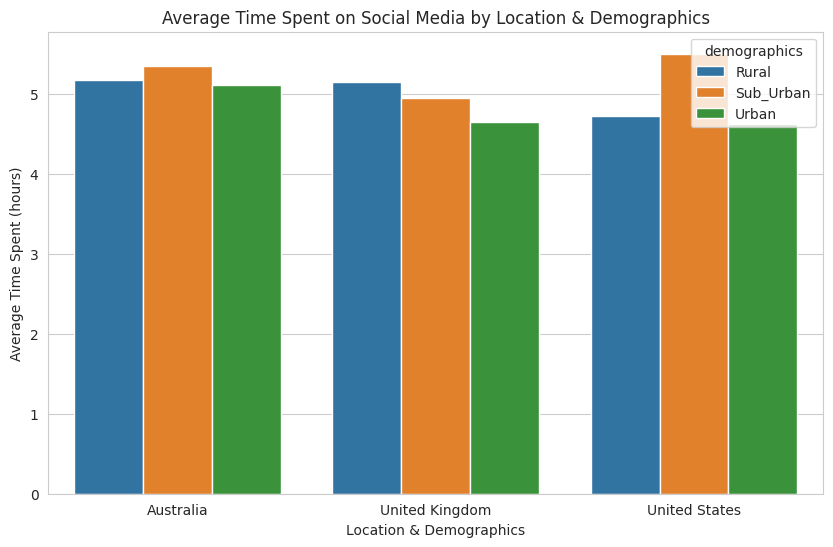

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='time_spent', hue='demographics', data=avg_time_by_location)
plt.title('Average Time Spent on Social Media by Location & Demographics')
plt.xlabel('Location & Demographics')
plt.ylabel('Average Time Spent (hours)')
plt.show()


In [ ]:
# Calculate the average time spent on social media for profession and platform
avg_time_by_profession = df.groupby(['profession', 'platform'])['time_spent'].mean().reset_index()
avg_time_by_profession

,profession,platform,time_spent
0,Marketer Manager,Facebook,5.281818
1,Marketer Manager,Instagram,5.031250
2,Marketer Manager,YouTube,4.991453
3,Software Engineer,Facebook,4.797872
4,Software Engineer,Instagram,5.265625
5,Software Engineer,YouTube,4.719298
6,Student,Facebook,5.048544
7,Student,Instagram,5.158879
8,Student,YouTube,4.898990


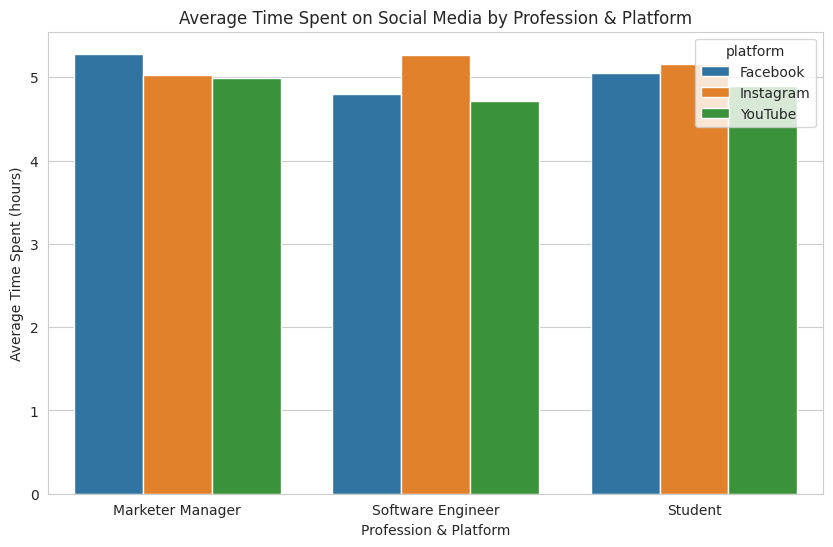

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='profession', y='time_spent', hue='platform', data=avg_time_by_profession)
plt.title('Average Time Spent on Social Media by Profession & Platform')
plt.xlabel('Profession & Platform')
plt.ylabel('Average Time Spent (hours)')
plt.show()

In [ ]:
# Calculate the average time spent on social media for intereset
avg_time_by_interest = df.groupby('interests')['time_spent'].mean().reset_index()
avg_time_by_interest

,interests,time_spent
0,Lifestlye,5.143695
1,Sports,4.845921
2,Travel,5.094512


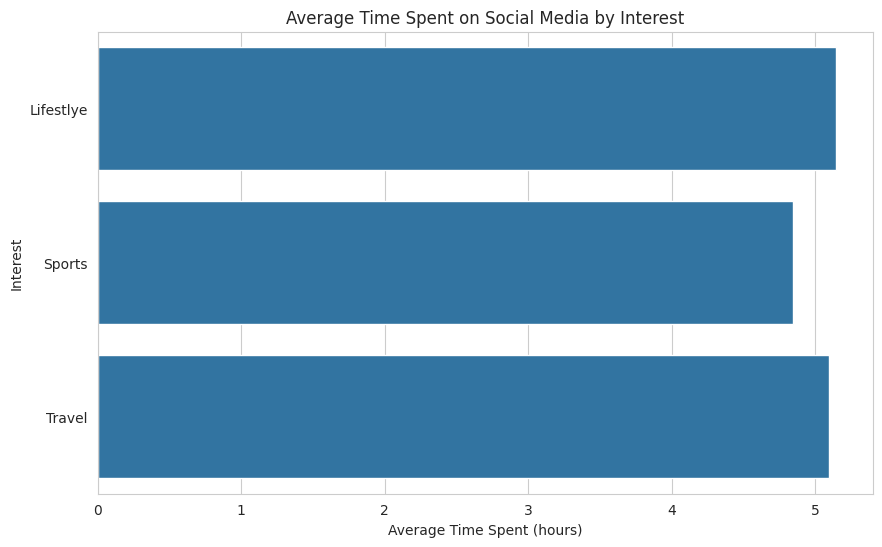

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_spent', y='interests', data=avg_time_by_interest)
plt.title('Average Time Spent on Social Media by Interest')
plt.xlabel('Average Time Spent (hours)')
plt.ylabel('Interest')
plt.show()

In [ ]:
# Calculate the average time spent on social media for indebt
avg_time_by_indebt_status = df.groupby('indebt')['time_spent'].mean().reset_index()
avg_time_by_indebt_status

,indebt,time_spent
0,False,4.996024
1,True,5.062374


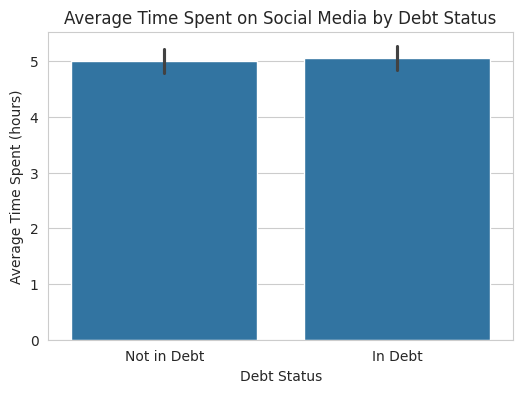

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='indebt', y='time_spent', data=df)
plt.title('Average Time Spent on Social Media by Debt Status')
plt.xlabel('Debt Status')
plt.ylabel('Average Time Spent (hours)')
plt.xticks(ticks=[0, 1], labels=['Not in Debt', 'In Debt'])
plt.show()

In [ ]:
# Calculate the average time spent on social media for own car
avg_time_by_car_ownership = df.groupby('Owns_Car')['time_spent'].mean().reset_index()
avg_time_by_car_ownership

,Owns_Car,time_spent
0,False,5.084599
1,True,4.981447


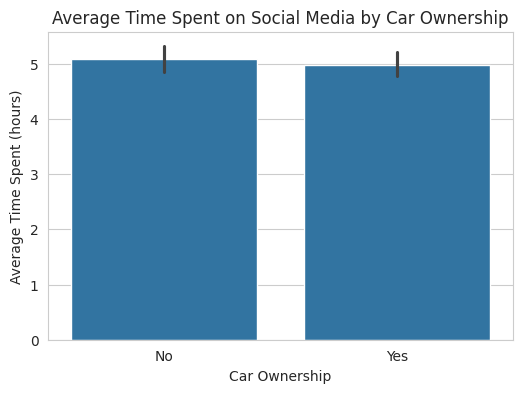

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Owns_Car', y='time_spent', data=df)
plt.title('Average Time Spent on Social Media by Car Ownership')
plt.xlabel('Car Ownership')
plt.ylabel('Average Time Spent (hours)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

Let's analyze people who are "addicted" with time spent more than 6 hours on social media, higher than the average time spent.

In [ ]:
# Average time spent
time = df['time_spent'].mean()
print('Average time spent on Social Media is', time)

Average time spent on Social Media is 5.029


In [ ]:
# Lets filter gender with time spent that more than 6 hours
addict_gender = df[df['time_spent']>6]['gender'].value_counts().reset_index()
addict_gender

,index,gender
0,female,119
1,non-binary,113
2,male,95


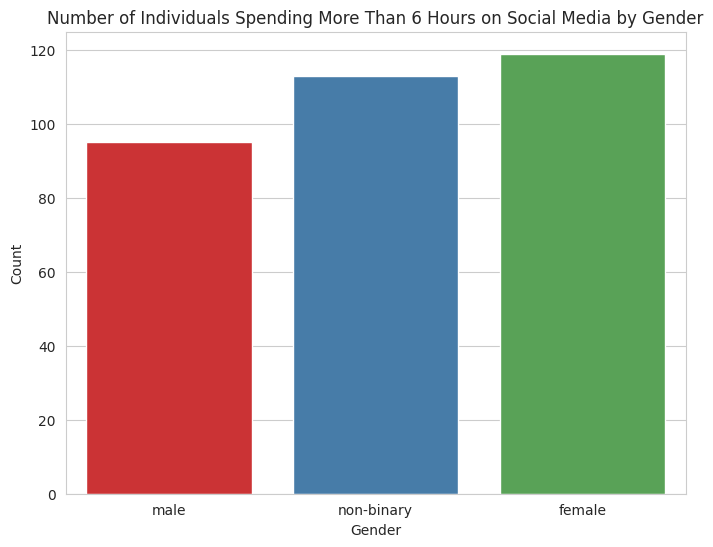

In [ ]:
addict_df = df[df['time_spent'] > 6]

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=addict_df, palette='Set1')
plt.title('Number of Individuals Spending More Than 6 Hours on Social Media by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Lets filter platform uses with time spent that more than 6 hours
addict_platform = df[df['time_spent']>6]['platform'].value_counts().reset_index()
addict_platform

,index,platform
0,Instagram,126
1,YouTube,103
2,Facebook,98


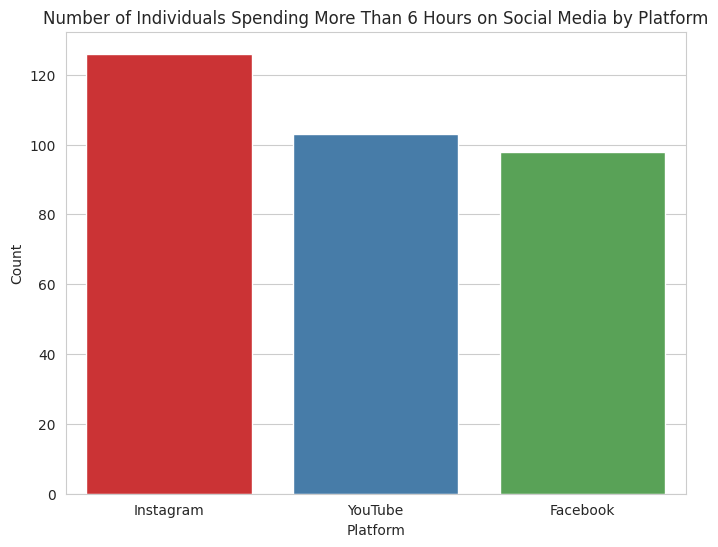

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='platform', data=addict_df, palette='Set1')
plt.title('Number of Individuals Spending More Than 6 Hours on Social Media by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

In [ ]:
# Lets filter age category with time spent that more than 6 hours
addict_platform = df[df['time_spent']>6]['Age Category'].value_counts().reset_index()
addict_platform

,index,Age Category
0,middel aged Adults,148
1,Young Adults,92
2,aged,87


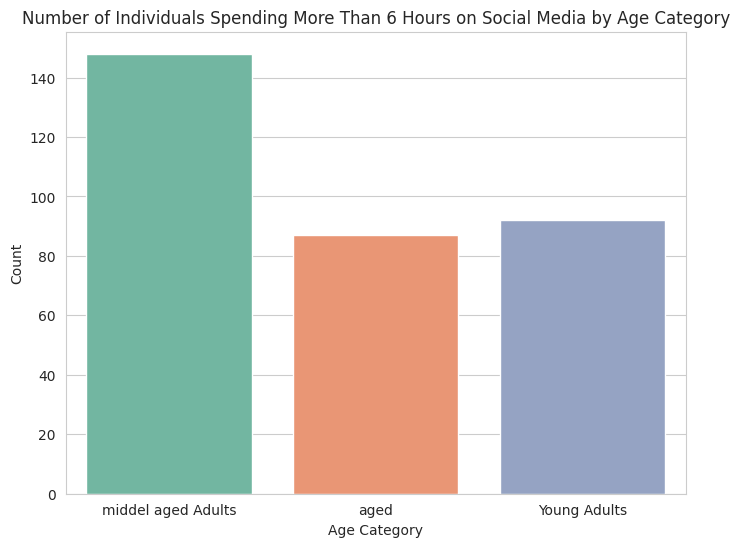

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Category', data=addict_df, palette='Set2')
plt.title('Number of Individuals Spending More Than 6 Hours on Social Media by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

### **Reminder**


---



In today's digital age, spending excessive time on social media has become a common habit for many. However, it's essential to recognize the potential negative effects of such behavior and take steps to manage it effectively. Here's a brief reminder and some practical advice for those who find themselves spending more than six hours a day on social media:

* **Set Boundaries**: Establish clear time limits for social media usage and consider using apps to track and limit screen time.

* **Prioritize Offline Activities**: Dedicate time to activities that enrich your life offline, such as hobbies, exercise, and spending quality time with loved ones.

* **Mindful Consumption**: Be selective about the content you consume and avoid accounts that cause stress or negative feelings.

* **Engage Meaningfully**: Use social media as a platform for positive interactions, meaningful connections, and learning opportunities.

* **Take Regular Breaks**: Incorporate breaks from social media into your daily routine to relax and recharge.

* **Seek Support if Needed**: Don't hesitate to seek support from friends, family, or professionals if you find it challenging to manage your social media usage on your own.

Remember, moderation is key. By implementing these simple strategies, you can maintain a healthier relationship with social media and enjoy a more balanced lifestyle.

**Take care of yourself and prioritize your well-being above all else.**